In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [55]:
df1.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [56]:
# label is dependent feature so we'll drop label

x = df.drop('label',axis=1)

In [57]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [58]:
#similarly we'll get the dependent value

y = df['label']

In [59]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [60]:
df1.shape

(5200, 4)

###### feature engineering

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
# we'll then clean the data
df = df.dropna()
messages = df.copy()
messages.reset_index(inplace=True)

In [63]:
# we'll then clean the data
df1 = df1.dropna()
messages1 = df1.copy()
messages1.reset_index(inplace=True)

In [64]:
messages1.head()

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [65]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [66]:
ps = PorterStemmer()
corpus = []
corpus1 = []

In [67]:
for i in range(0,len(messages1)):
    text = re.sub('[^a-zA-Z]',' ',messages1['title'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus1.append(text)

In [68]:
for i in range(0,len(messages)):
    text = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [69]:
corpus[100]

'snap share leap debut investor doubt valu vanish new york time'

In [70]:
corpus1[100]

'elizabeth warren need justic depart obstruct justic depart breitbart'

In [71]:
#Applying counter vectorizer

In [72]:
count_vec = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = count_vec.fit_transform(corpus).toarray()

In [73]:
X1 = count_vec.fit_transform(corpus1).toarray()

In [74]:
X1.shape

(4575, 5000)

In [75]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
y = messages['label']

In [77]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [78]:
#Now dividing the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)

In [79]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
count_vec.get_feature_names()[:20]

['aaron',
 'abandon',
 'abba',
 'abbi',
 'abbi martin',
 'abbi martin expos',
 'abc',
 'abe',
 'abedin',
 'abedin email',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'abroad new',
 'abroad new york',
 'absolut',
 'abus',
 'abus breitbart',
 'abus new']

In [81]:
count_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [82]:
count_df = pd.DataFrame(X_train, columns = count_vec.get_feature_names())

In [83]:
count_df

,aaron,abandon,abba,abbi,abbi martin,abbi martin expos,abc,abe,abedin,abedin email,...,zika,zika new,zika new york,zika viru,zimbabw,zone,zone new,zone new york,zuckerberg,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
import matplotlib.pyplot as plt

In [85]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix, without normalization")
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel("Predicted label")
    

## Multinomial Naive Bayes Algorithm

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
classifier = MultinomialNB()


In [88]:
from sklearn import metrics
import numpy as np
import itertools

train accuracy: 0.924
test accuracy: 0.901
Confusion matrix, without normalization


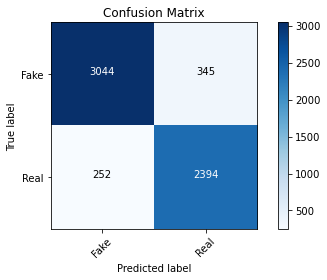

In [89]:
classifier.fit(X_train,Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test,pred)
score1 = metrics.accuracy_score(Y_train,classifier.predict(X_train))
print("train accuracy: %0.3f" %score1)
print("test accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])

## Passive Aggressive Classifier Algorithm

###### This algo works very well with text data as it is very clear from the accuracy score

In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

train accuracy: 1.000
test accuracy: 0.918
Confusion matrix, without normalization


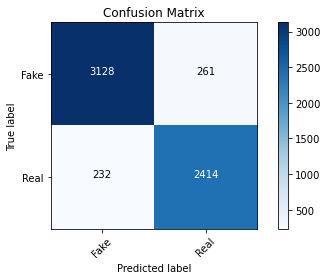

In [94]:
linear_clf.fit(X_train,Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test,pred)
score1 = metrics.accuracy_score(Y_train,linear_clf.predict(X_train))
print("train accuracy: %0.3f" %score1)
print("test accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])

## Multinomial Classifier with Hyperparameter

In [92]:
classifier = MultinomialNB(alpha=0.1)
initial_score = 0

In [93]:
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train,Y_train)
    pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test,pred)
    if score > initial_score:
        classifier = sub_classifier
    print("Alpha: {}, Score {}".format(alpha,score))
    

C:\Users\sanja\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score 0.8906379453189727
Alpha: 0.1, Score 0.9012427506213753
Alpha: 0.2, Score 0.9015741507870754
Alpha: 0.30000000000000004, Score 0.9015741507870754
Alpha: 0.4, Score 0.9007456503728252
Alpha: 0.5, Score 0.9005799502899752
Alpha: 0.6000000000000001, Score 0.9015741507870754
Alpha: 0.7000000000000001, Score 0.9019055509527755
Alpha: 0.8, Score 0.9007456503728252
Alpha: 0.9, Score 0.9009113504556753
